Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel$\rightarrow$Restart) and then run all cells (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sunsun Kasajoo"
ID = "st122283"

# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [2]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [3]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

**Tips for using intellisense: Shift+TAB**

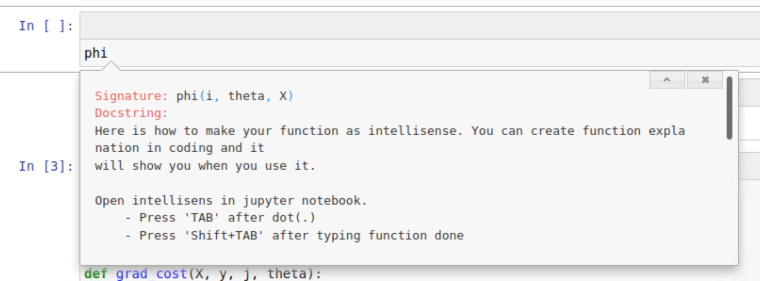

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [4]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

## Exercise 1.1 (5 points)

Create a function to load **data** from **Iris.csv** using the Pandas library and extract y from the data.

You can use [the Pandas 10 minute guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn how to use pandas.

In [5]:
def load_data(file_name, drop_label, y_label, is_print=False):
    # 1. Load csv file
    data = pd.read_csv(file_name)
    if is_print:
        print(data.head())
    # 2. remove 'Id' column from data
    if drop_label is not None:
        data = data.drop([drop_label],axis=1)
        if is_print:
            print(data.head())
    # 3. Extract y_label column as y from data
    y = data.loc[:,y_label]
    # 4. get index of y-column
    y_index = data.columns.get_loc(y_label)
    # 5. Extrack X features from data
    X = data.iloc[:,data.columns != y_label]
    return X, y

In [6]:
X, y = load_data('Iris.csv', 'Id', 'Species', True)
print(X.head())
print(y[:5])

# Test function: Do not remove
# tips: this is how to create dataset using pandas
d_ex = {'ID':     [  1,   2,   3,    4,    5,    6,    7],
        'Grade':  [3.5, 2.5, 3.0, 3.75, 2.83, 3.95, 2.68],
        'Type':   ['A', 'B', 'C',  'A',  'C',  'A',  'B']
        }
df = pd.DataFrame (d_ex, columns = ['ID','Grade', 'Type'])
df.to_csv('out.csv', index=False)

Xtest, ytest = load_data('out.csv', 'ID', 'Type')
assert len(Xtest.columns) == 1, 'number of X_columns incorrect (1)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (1)'
assert ytest.shape == (7,), 'number of y is incorrect (1)'
assert 'Grade' in Xtest.columns, 'Incorrect columns in X (1)'
Xtest, ytest = load_data('out.csv', None, 'Type')
assert len(Xtest.columns) == 2, 'number of X_columns incorrect (2)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (2)'
assert ytest.shape == (7,), 'number of y is incorrect (2)'
assert 'Grade' in Xtest.columns and 'ID' in Xtest.columns, 'Incorrect columns in X (2)'
import os
os.remove('out.csv')

assert len(X.columns) == 4, 'number of X_columns incorrect (3)'
assert 'SepalWidthCm' in X.columns and 'Id' not in X.columns and 'Species' not in X.columns, 'Incorrect columns in X (3)'
assert y.name == 'Species', 'Extract y_column is incorrect (3)'
assert y.shape == (150,), 'number of y is incorrect (3)'

print("success!")
# End Test function

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5          

**Expected result**: \
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm \
0            5.1           3.5            1.4           0.2\
1            4.9           3.0            1.4           0.2\
2            4.7           3.2            1.3           0.2\
3            4.6           3.1            1.5           0.2\
4            5.0           3.6            1.4           0.2\
0    Iris-setosa\
1    Iris-setosa\
2    Iris-setosa\
3    Iris-setosa\
4    Iris-setosa\
Name: Species, dtype: object

## Exercise 1.2 (10 points)

Partition data into training and test sets
- No need to use random.seed function!
- Ensure that the train set is 70% and the test set is 30% of the data.
- Encode the labels in the y attribute to be integers in the range 0..k-1.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the <tt>partition</tt> function from lab02 if you like
    <p></p>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html">panda.iloc</a> must be used to extract data from an index list
    <p></p>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.unique.html">panda.unique</a> will give you the set of unique labels
</details>

In [7]:
def partition(X, y, percent_train):
    m, n = X.shape
    print("SHAPE ===>")

    # 1. create index list
    idx = np.arange(0, m)
    # 2. shuffle index
    random.shuffle(idx)
    
    # 3. Create train/test index
    percent_train = .7
    m_train = int(m * percent_train)
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:]
    
    # 4. Separate X_Train, y_train, X_test, y_test
    X_train = X.iloc[train_idx,:];
    X_test = X.iloc[test_idx,:];
    y_train = y.iloc[train_idx];
    y_test = y.iloc[test_idx];
    
    # 5. Get y_labels_name from y using pandas.unique function
    y_labels_name = pd.unique(y)
    y_labels_new = []
    # 6. Change y_labels_name into string number and put into y_labels_new
    for i in range(len(y_labels_name)):
        y_labels_new.append(i)
        
    y_train.replace(y_labels_name, y_labels_new, inplace = True)
    y_test.replace(y_labels_name, y_labels_new, inplace = True)
        
    # 7. Drop shuffle index columns
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    #     - pandas.reset_index() and pandas.drop(...) might be help
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [8]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X, y, percent_train)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

# Test function: Do not remove
assert len(y_labels_name) == 3 and len(y_labels_new) == 3, 'number of y uniques are incorrect'
assert X_train.shape == (105, 4), 'Size of X_train is incorrect'
assert X_test.shape == (45, 4), 'Size of x_test is incorrect'
assert y_train.shape == (105, ), 'Size of y_train is incorrect'
assert y_test.shape == (45, ), 'Size of y_test is incorrect'
assert 'Iris-setosa' in y_labels_name and 'Iris-virginica' in y_labels_name and \
        'Iris-versicolor' in y_labels_name, 'y unique data incorrect'
assert min(y_labels_new) == 0 and max(y_labels_new) < 3, 'label indices are incorrect'

print("success!")
# End Test function

SHAPE ===>
X_train.shape (105, 4)
X_test.shape (45, 4)
y_train.shape (105,)
y_test.shape (45,)
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_labels_new:  [0, 1, 2]
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.8           2.7            3.9           1.2
1            4.7           3.2            1.6           0.2
2            4.9           2.4            3.3           1.0
3            6.3           3.4            5.6           2.4
4            6.5           3.2            5.1           2.0
0    1
1    0
2    1
3    2
4    2
Name: Species, dtype: int64
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
X_train.shape (105, 4)\
X_test.shape (45, 4)\
y_train.shape (105,)\
y_test.shape (45,)\
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] \
y_labels_new:  [0, 1, 2]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm\
0            6.4           2.8            5.6           2.2\
1            6.7           3.3            5.7           2.1\
2            4.6           3.4            1.4           0.3\
3            5.1           3.8            1.5           0.3\
4            5.0           2.3            3.3           1.0\
   Species\
0        2\
1        2\
2        0\
3        0\
4        1

## Exercise 1.3 (5 points)

Train your classification model using the `gradient_descent` function already provided.
You might also play around with the gradient descent function to see if you can speed it up!

In [9]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data
r, c = X_train.shape

# Initialize theta for each class
theta_initial = np.ones((num_class, c))

alpha = .05
iterations = 200

# Logistic regression
theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)

In [10]:
print(theta)
print(theta.shape)

# Test function: Do not remove
assert theta.shape == (3, 5), 'Size of theta is incorrect'

print("success!")
# End Test function

[[ 1.17366476  1.32705859  1.83710525 -0.20142927  0.42324661]
 [ 1.06976684  1.18366209  0.68725246  1.17098198  0.87435125]
 [ 0.7565684   0.48927932  0.47564229  2.03044729  1.70240214]]
(3, 5)
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[ 1.17632192  1.32360047  1.83204165 -0.20224445  0.44039155]\
 [ 1.10140069  1.13537321  0.74833178  1.21907866  0.82567377]\
 [ 0.72227738  0.54102632  0.41962657  1.98316579  1.73393467]]\
\
(3, 5)

## Exercise 1.4 (5 points)

Let's get your model to make predictions on the test data.

In [11]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
    # calculate y_hat using hypothesis function
    y_hat = h(row, theta, num_class)
    # find the index (integer value) of maximum value in y_hat and input back to prediction
    result = int(np.where(y_hat == np.amax(y_hat))[0])
    prediction = result

    # collect the result
    y_pred.append(prediction)

In [12]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

# Test function: Do not remove
assert len(y_pred) == 45, 'Size of y_pred is incorrect'
assert isinstance(y_pred[0], int) and isinstance(y_pred[15], int) and isinstance(y_pred[17], int), 'prediction type is incorrect'
assert max(y_pred) < 3 and min(y_pred) >= 0, 'wrong index of y_pred'

print("success!")
# End Test function

45
[0, 2, 0, 2, 2, 0, 1]
<class 'int'>
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
45 \
[2, 0, 2, 0, 0, 0, 2] \
<class 'int'>

## Exercise 1.5 (5 points)

Estimate accuracy of model on test data

$$\text{accuracy} = \frac{\text{number of correct test predictions}}{m_{\text{test}}}$$

In [13]:
def calc_accuracy(y_test, y_pred):
    m = len(y_test)
    y_test = np.array(y_test)
    count = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            count = count + 1

    accuracy = count/m
    return accuracy

In [14]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Test function: Do not remove
assert isinstance(accuracy, float), 'accuracy should be floating point'
assert accuracy >= 0.8, 'Did you train the data?'

print("success!")
# End Test function

Accuracy: 0.8222
success!


**Expected result**: should be at least 0.8!

## On your own in lab

We will do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


## Exercise 2.1 (15 points)

1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
   Name your function `my_J()` and implement

$$ J_j = -\delta(y, j)\log{\phi_j} $$


In [15]:
def my_J(theta, X, y, j, num_class):
    cost = -(indicator(y,j) * np.log(phi(j, theta, X, num_class)))
    return cost

In [16]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 3)
assert isinstance(cost, float), 'cost should be floating point'

print("success!")
# End Test function

success!


2. Implement <code>my_grad_cost</code> using your <code>my_J</code> function

In [17]:
def my_grad_cost(X, y, j, theta, num_class):
    m, n = X.shape
    cost = 0
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        c = my_J(theta, X.iloc[i], y.iloc[i], j, num_class)
        sum = sum + (X.loc[i] * p)
        cost = cost + c
    grad = -sum / m
    return grad, cost

In [18]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)
assert isinstance(cost, float), 'cost should be floating point'
assert isinstance(grad['intercept'], float) and \
        isinstance(grad['SepalLengthCm'], float) and \
        isinstance(grad['SepalWidthCm'], float) and \
        isinstance(grad['PetalLengthCm'], float) and \
        isinstance(grad['PetalWidthCm'], float) , 'grad should be floating point'
print("success!")
# End Test function

intercept       -0.047619
SepalLengthCm    0.026032
SepalWidthCm    -0.267937
PetalLengthCm    0.640317
PetalWidthCm     0.291746
dtype: float64
43.94449154672438
success!


**Expect result**: <span style="color:blue">(*or similar*)</span>\
intercept        0.009524\
SepalLengthCm    0.316825\
SepalWidthCm    -0.091429\
PetalLengthCm    0.780000\
PetalWidthCm     0.329524\
dtype: float64\
37.352817814715735

3. Implement <code>my_gradient_descent</code> using your <code>my_grad_cost</code> function

In [19]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    n = X.shape[1]
    for iter in range(iters):
        cost = 0
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] , c = my_grad_cost(X, y, j, theta, num_class)
            cost = cost + c
        cost_arr.append(cost)
        theta = theta - alpha * dtheta
    return theta, cost_arr

In [20]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 3)
print(theta)
print(cost)
print("success!")
# End Test function

[[1.00024436 0.99990967 1.00135815 0.99682968 0.99855216]
 [0.99976912 0.99885513 0.99881929 0.99999202 0.99997851]
 [0.99998652 1.0012352  0.99982256 1.0031783  1.00146933]]
[115.35429031015153, 115.22206285569246, 115.09191307676102, 114.96376684405257, 114.8375525293126]
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[1.00001186 0.99618853 1.00183642 0.9889817  0.99528923]\
 [1.00009697 1.0011823  0.99883395 1.00316763 1.00083055]\
 [0.99987915 1.00255606 0.99929351 1.00779768 1.00386218]]\
[114.00099216453735, 113.89036233839263, 113.78163144339288, 113.67472269747496, 113.56956268162737]\
37.352817814715735

## Exercise 2.2 (20 points)

4. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
5. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.

In [21]:
import matplotlib.pyplot as plt

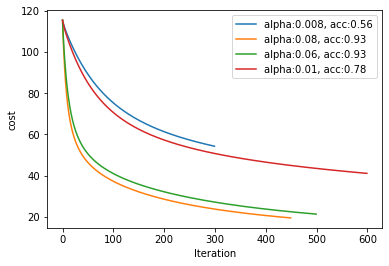

In [22]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# design your own learning rate and num iterations
alpha_arr = np.array([0.008, 0.08, 0.06, 0.01])
iterations_arr = np.array([300, 450, 500, 600])

def calc_y_pred(X, theta):
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        # calculate y_hat using hypothesis function
        y_hat = h(row, theta, num_class)
        # find the index (integer value) of maximum value in y_hat and input back to prediction
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        # collect the result
        y_pred.append(prediction)
    return y_pred

for i in range(4):
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred = calc_y_pred(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)
    
plt.plot(cost_arr[0], label='alpha:0.008, acc:'+ str(round(accuracy_arr[0],2)))
plt.plot(cost_arr[1], label='alpha:0.08, acc:'+ str(round(accuracy_arr[1],2)))
plt.plot(cost_arr[2], label='alpha:0.06, acc:'+ str(round(accuracy_arr[2],2)))
plt.plot(cost_arr[3], label='alpha:0.01, acc:'+ str(round(accuracy_arr[3],2)))
plt.xlabel("Iteration")
plt.ylabel("cost")
plt.legend()
plt.show()
    
    
    


**Expected result**: <span style="color:blue">(*Yours doesn't have to be the same!*)</span>

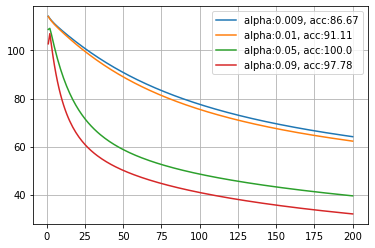

Accuracy is => 0.9142857142857143
(105, 5)


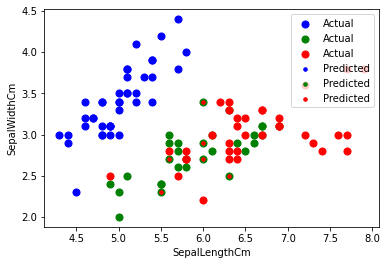

In [23]:
y_pred = calc_y_pred(X_train, theta)
accuracy = calc_accuracy(y_train, y_pred)
print("Accuracy is =>", accuracy)
print(X_train.shape)
m, n = X_train.shape

#Split the X_train into classes based on the y_test
X_train_idx0 = []
X_train_idx1 = []
X_train_idx2 = []

X_train_p_idx0 = []
X_train_p_idx1 = []
X_train_p_idx2 = []

error_index = []

for i in range(len(y_train)):
    if y_train[i] == 0:
        X_train_idx0.append(i)
    elif y_train[i] == 1:
        X_train_idx1.append(i)
    else:
        X_train_idx2.append(i)

X_train_0 = X_train.iloc[X_train_idx0, :]
X_train_1 = X_train.iloc[X_train_idx1, :]
X_train_2 = X_train.iloc[X_train_idx2, :]


for i in range(len(y_pred)):
    if y_pred[i] == 0:
        X_train_p_idx0.append(i)
    elif y_pred[i] == 1:
        X_train_p_idx1.append(i)
    else:
        X_train_p_idx2.append(i)


X_train_p_0 = X_train.iloc[X_train_p_idx0, :]
X_train_p_1 = X_train.iloc[X_train_p_idx1, :]
X_train_p_2 = X_train.iloc[X_train_p_idx2, :]


plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X_train_0['SepalLengthCm'],X_train_0['SepalWidthCm'], s=50, c='b', marker='o', label='Actual')
plt.scatter(X_train_1['SepalLengthCm'],X_train_1['SepalWidthCm'], s=50, c='g', marker='o', label='Actual')
plt.scatter(X_train_2['SepalLengthCm'],X_train_2['SepalWidthCm'], s=50, c='r', marker='o', label='Actual')

plt.scatter(X_train_p_0['SepalLengthCm'],X_train_p_0['SepalWidthCm'], s=50, c='b', marker='.', label='Predicted')
plt.scatter(X_train_p_1['SepalLengthCm'],X_train_p_1['SepalWidthCm'], s=50, c='g', marker='.', label='Predicted')
plt.scatter(X_train_p_2['SepalLengthCm'],X_train_p_2['SepalWidthCm'], s=50, c='r', marker='.', label='Predicted')

plt.legend()
plt.show()


# print(X_train_idx0)
# print(X_train_p_idx0)

# print(X_train_idx1)
# print(X_train_p_idx1)

# print(X_train_idx2)
# print(X_train_p_idx2)
        



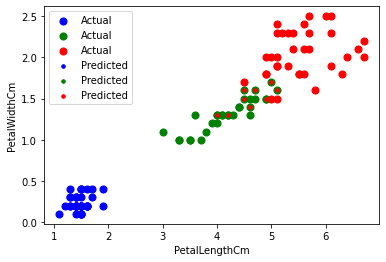

In [24]:
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(X_train_0['PetalLengthCm'],X_train_0['PetalWidthCm'], s=50, c='b', marker='o', label='Actual')
plt.scatter(X_train_1['PetalLengthCm'],X_train_1['PetalWidthCm'], s=50, c='g', marker='o', label='Actual')
plt.scatter(X_train_2['PetalLengthCm'],X_train_2['PetalWidthCm'], s=50, c='r', marker='o', label='Actual')

plt.scatter(X_train_p_0['PetalLengthCm'],X_train_p_0['PetalWidthCm'], s=50, c='b', marker='.', label='Predicted')
plt.scatter(X_train_p_1['PetalLengthCm'],X_train_p_1['PetalWidthCm'], s=50, c='g', marker='.', label='Predicted')
plt.scatter(X_train_p_2['PetalLengthCm'],X_train_p_2['PetalWidthCm'], s=50, c='r', marker='.', label='Predicted')
plt.legend()
plt.show()

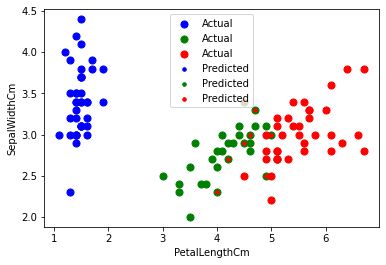

In [25]:
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X_train_0['PetalLengthCm'],X_train_0['SepalWidthCm'], s=50, c='b', marker='o', label='Actual')
plt.scatter(X_train_1['PetalLengthCm'],X_train_1['SepalWidthCm'], s=50, c='g', marker='o', label='Actual')
plt.scatter(X_train_2['PetalLengthCm'],X_train_2['SepalWidthCm'], s=50, c='r', marker='o', label='Actual')

plt.scatter(X_train_p_0['PetalLengthCm'],X_train_p_0['SepalWidthCm'], s=50, c='b', marker='.', label='Predicted')
plt.scatter(X_train_p_1['PetalLengthCm'],X_train_p_1['SepalWidthCm'], s=50, c='g', marker='.', label='Predicted')
plt.scatter(X_train_p_2['PetalLengthCm'],X_train_p_2['SepalWidthCm'], s=50, c='r', marker='.', label='Predicted')
plt.legend()
plt.show()

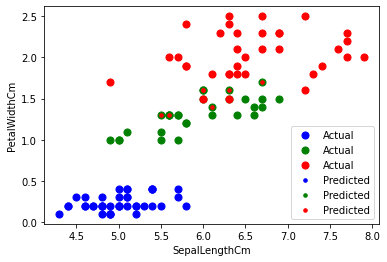

In [26]:
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(X_train_0['SepalLengthCm'],X_train_0['PetalWidthCm'], s=50, c='b', marker='o', label='Actual')
plt.scatter(X_train_1['SepalLengthCm'],X_train_1['PetalWidthCm'], s=50, c='g', marker='o', label='Actual')
plt.scatter(X_train_2['SepalLengthCm'],X_train_2['PetalWidthCm'], s=50, c='r', marker='o', label='Actual')

plt.scatter(X_train_p_0['SepalLengthCm'],X_train_p_0['PetalWidthCm'], s=50, c='b', marker='.', label='Predicted')
plt.scatter(X_train_p_1['SepalLengthCm'],X_train_p_1['PetalWidthCm'], s=50, c='g', marker='.', label='Predicted')
plt.scatter(X_train_p_2['SepalLengthCm'],X_train_p_2['PetalWidthCm'], s=50, c='r', marker='.', label='Predicted')
plt.legend()
plt.show()

From the scatter plots of actual class and predicted class we can see the overlap of some plots. This indicates that the model has predicted the wrong class for the given X values.

In the above plots, we can see the small red dots(predicted) are overlapping the big green dots(actual) which means that the values were predicted wrong (i.e it was predicted to be in the wrong class)

## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 97-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle (Tell the reference), clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.


Discussion :

The data set used for this exercise is the Star dataset to predict star types which has been taken from Kaggle. The datset consists of 240 rows with 6 classes - 

Brown Dwarf -> Star Type = 0
Red Dwarf -> Star Type = 1
White Dwarf-> Star Type = 2
Main Sequence -> Star Type = 3
Supergiant -> Star Type = 4
Hypergiant -> Star Type = 5

The dataset consists of several features of the star like - Temperature, Luminosity, Radius, Absolute magnitude, Star color, Spectral Class

In [27]:
# Extracting the X and y values from the dataset using the existing function load_data

X, y= load_data('star-prediction.csv', None, 'Star type', True)
print(X.head())
print(y.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020 

In [28]:
#Cleaning the dataset

#Converting strings values of Star color to numerical 
X.loc[:,'Star color'] = X['Star color'].str.capitalize()
X.loc[:,'Star color'] = X['Star color'].str.strip()


star_color_names = pd.unique(X['Star color'])
print(star_color_names)

X['Star color'].replace('Red', 0, inplace = True)
X['Star color'].replace('Blue-white', 1, inplace = True)
X['Star color'].replace('Blue white', 1, inplace = True)
X['Star color'].replace('White', 2, inplace = True)
X['Star color'].replace('Whitish', 3, inplace = True)
X['Star color'].replace('Yellowish white', 4, inplace = True)
X['Star color'].replace('Yellow-white', 5, inplace = True)
X['Star color'].replace('Pale yellow orange', 6, inplace = True)
X['Star color'].replace('Orange', 7, inplace = True)
X['Star color'].replace('White-yellow', 8, inplace = True)
X['Star color'].replace('Yellowish', 9, inplace = True)
X['Star color'].replace('Orange-red', 10, inplace = True)
X['Star color'].replace('Blue', 11, inplace = True)

#Converting spectral class to numerical value

X['Spectral Class'].replace('M', 0, inplace = True)
X['Spectral Class'].replace('B', 1, inplace = True)
X['Spectral Class'].replace('A', 2, inplace = True)
X['Spectral Class'].replace('F', 3, inplace = True)
X['Spectral Class'].replace('O', 4, inplace = True)
X['Spectral Class'].replace('K', 5, inplace = True)
X['Spectral Class'].replace('G', 6, inplace = True)

['Red' 'Blue white' 'White' 'Yellowish white' 'Pale yellow orange' 'Blue'
 'Blue-white' 'Whitish' 'Yellow-white' 'Orange' 'White-yellow' 'Yellowish'
 'Orange-red']


In [29]:
# Normalization of data
def normalized_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds

X_norm = normalized_data(X)

print(X_norm)

# Partitioning the dataset
m, n = X_norm.shape
print("SHAPE ===>",m,n)

# 1. create index list
idx = np.arange(0, m)
# 2. shuffle index
random.shuffle(idx)

# 3. Create train/test index
percent_train = .7
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]

# 4. Separate X_Train, y_train, X_test, y_test
X_train = X_norm.iloc[train_idx,:];
X_test = X_norm.iloc[test_idx,:];
y_train = y.iloc[train_idx];
y_test = y.iloc[test_idx];

#reseting the index
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())



     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0          -0.779382         -0.598624     -0.459210                1.116745   
1          -0.782110         -0.598624     -0.459241                1.162414   
2          -0.828477         -0.598624     -0.459342                1.362213   
3          -0.807496         -0.598624     -0.459229                1.167171   
4          -0.897819         -0.598624     -0.459340                1.491607   
..               ...               ...           ...                     ...   
235         2.983743          1.494720      2.167974               -1.361718   
236         2.133913          4.059319      1.854068               -1.428317   
237        -0.175029          2.403157      2.297800               -1.437832   
238        -0.132438          1.662878      1.695177               -1.485403   
239         2.872754          1.048345      2.995370               -1.159064   

     Star color  Spectral Class  
0    

In [30]:
#Cleaning and preparing the dataset
print('Missing values for X_train data:\n------------------------\n', X_train.isnull().sum())
print('Missing values for y_train data \n ------------------------\n', y_train.isnull().sum())

print('Missing values for X_test data:\n------------------------\n', X_test.isnull().sum())
print('Missing values for y_test data \n ------------------------\n', y_test.isnull().sum())


Missing values for X_train data:
------------------------
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star color                0
Spectral Class            0
dtype: int64
Missing values for y_train data 
 ------------------------
 0
Missing values for X_test data:
------------------------
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star color                0
Spectral Class            0
dtype: int64
Missing values for y_test data 
 ------------------------
 0


In [31]:

#To find no of class
y_labels = pd.unique(y)
num_class = len(y_labels)


if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)
    
print(X_train)
r, c = X_train.shape

theta_initial = np.ones((num_class, c))
print(theta_initial)

alpha = .05
iterations = 200

# Logistic regression
theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
print(theta)
print(X_train)


     intercept  Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
0            1        -0.801622         -0.598624     -0.459388   
1            1         3.094941          3.941804     -0.432412   
2            1        -0.699865          0.518333     -0.422723   
3            1        -0.153943         -0.598372     -0.454443   
4            1        -0.083657         -0.598210     -0.453939   
..         ...              ...               ...           ...   
163          1        -0.626432         -0.598623     -0.457863   
164          1        -0.740253         -0.598623     -0.458859   
165          1         0.050620         -0.598624     -0.459522   
166          1        -0.735113          0.909267      2.485756   
167          1        -0.738994         -0.598624     -0.459390   

     Absolute magnitude(Mv)  Star color  Spectral Class  
0                  1.444036   -0.730492       -0.841613  
1                 -1.009690    1.680131        1.599319  
2                 -1.

In [32]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

def calc_y_pred(X, theta):
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        # calculate y_hat using hypothesis function
        y_hat = h(row, theta, num_class)
        # find the index (integer value) of maximum value in y_hat and input back to prediction
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        # collect the result
        y_pred.append(prediction)
    return y_pred

y_pred = calc_y_pred(X_test, theta)
    
accuracy = calc_accuracy(y_test, y_pred)
print("The accuracy of the model is", accuracy)

The accuracy of the model is 0.9861111111111112


     intercept  Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
0            1        -0.801622         -0.598624     -0.459388   
1            1         3.094941          3.941804     -0.432412   
2            1        -0.699865          0.518333     -0.422723   
3            1        -0.153943         -0.598372     -0.454443   
4            1        -0.083657         -0.598210     -0.453939   
..         ...              ...               ...           ...   
163          1        -0.626432         -0.598623     -0.457863   
164          1        -0.740253         -0.598623     -0.458859   
165          1         0.050620         -0.598624     -0.459522   
166          1        -0.735113          0.909267      2.485756   
167          1        -0.738994         -0.598624     -0.459390   

     Absolute magnitude(Mv)  Star color  Spectral Class  
0                  1.444036   -0.730492       -0.841613  
1                 -1.009690    1.680131        1.599319  
2                 -1.

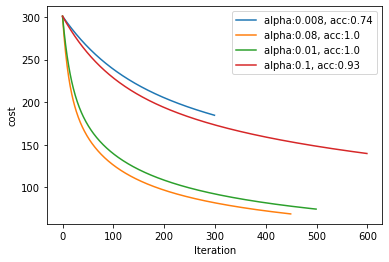

In [33]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# design your own learning rate and num iterations
alpha_arr = np.array([0.008, 0.08, 0.06, 0.01])
iterations_arr = np.array([300, 450, 500, 600])

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)
print(X_train)


for i in range(4):
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred = calc_y_pred(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)
    
plt.plot(cost_arr[0], label='alpha:0.008, acc:'+ str(round(accuracy_arr[0],2)))
plt.plot(cost_arr[1], label='alpha:0.08, acc:'+ str(round(accuracy_arr[1],2)))
plt.plot(cost_arr[2], label='alpha:0.01, acc:'+ str(round(accuracy_arr[2],2)))
plt.plot(cost_arr[3], label='alpha:0.1, acc:'+ str(round(accuracy_arr[3],2)))
plt.xlabel("Iteration")
plt.ylabel("cost")
plt.legend()
plt.show()

Accuracy is => 0.8988095238095238
(168, 7)


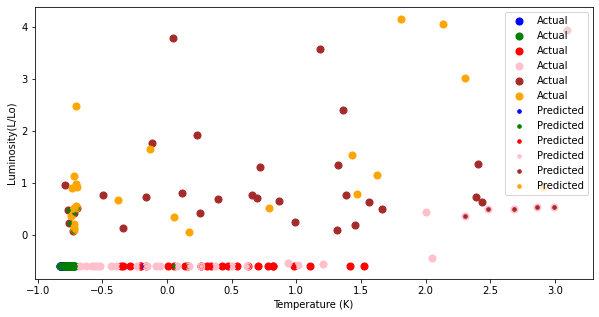

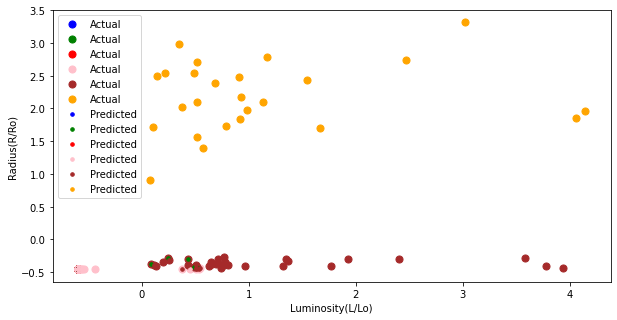

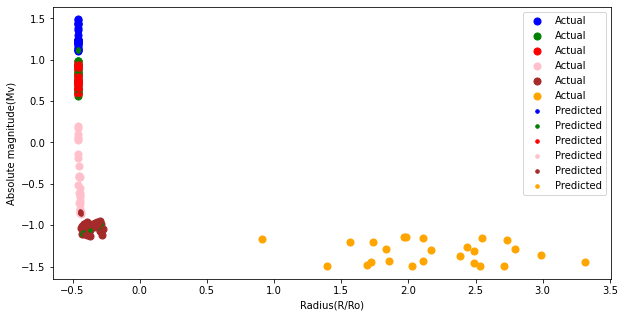

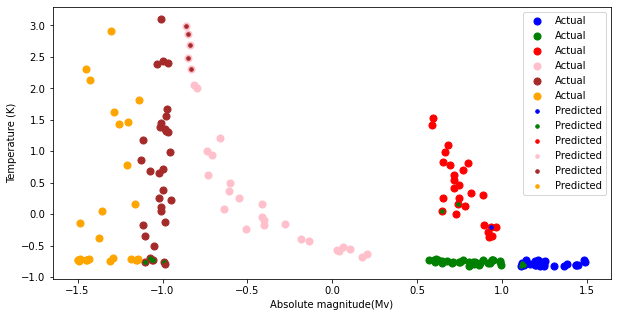

In [34]:
from matplotlib.pyplot import figure

y_pred = calc_y_pred(X_train, theta)
accuracy = calc_accuracy(y_train, y_pred)
print("Accuracy is =>", accuracy)
print(X_train.shape)
m, n = X_train.shape

#Split the X_train into classes based on the y_test
X_train_idx0 = []
X_train_idx1 = []
X_train_idx2 = []
X_train_idx3 = []
X_train_idx4 = []
X_train_idx5 = []

X_train_p_idx0 = []
X_train_p_idx1 = []
X_train_p_idx2 = []
X_train_p_idx3 = []
X_train_p_idx4 = []
X_train_p_idx5 = []


for i in range(len(y_train)):
    if y_train[i] == 0:
        X_train_idx0.append(i)
    elif y_train[i] == 1:
        X_train_idx1.append(i)
    elif y_train[i] == 2:
        X_train_idx2.append(i)
    elif y_train[i] == 3:
        X_train_idx3.append(i)
    elif y_train[i] == 4:
        X_train_idx4.append(i)
    else:
        X_train_idx5.append(i)
        
    if y_pred[i] == 0:
        X_train_p_idx0.append(i)
    elif y_pred[i] == 1:
        X_train_p_idx1.append(i)
    elif y_pred[i] == 2:
        X_train_p_idx2.append(i)
    elif y_pred[i] == 3:
        X_train_p_idx3.append(i)
    elif y_pred[i] == 4:
        X_train_p_idx4.append(i)
    else:
        X_train_p_idx5.append(i)
  
#Spliting the x train
X_train_0 = X_train.iloc[X_train_idx0, :]
X_train_1 = X_train.iloc[X_train_idx1, :]
X_train_2 = X_train.iloc[X_train_idx2, :]
X_train_3 = X_train.iloc[X_train_idx3, :]
X_train_4 = X_train.iloc[X_train_idx4, :]
X_train_5 = X_train.iloc[X_train_idx5, :]


X_train_p_0 = X_train.iloc[X_train_p_idx0, :]
X_train_p_1 = X_train.iloc[X_train_p_idx1, :]
X_train_p_2 = X_train.iloc[X_train_p_idx2, :]
X_train_p_3 = X_train.iloc[X_train_p_idx3, :]
X_train_p_4 = X_train.iloc[X_train_p_idx4, :]
X_train_p_5 = X_train.iloc[X_train_p_idx5, :]

features_x = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
features_y = ['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']
plot_label_x = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
plot_label_y = ['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Temperature (K)']

for i in range(len(features_x)):
  
    figure(figsize=(10, 5))
    plt.scatter(X_train_0[features_x[i]],X_train_0[features_y[i]], s=50, c='b', marker='o', label='Actual')
    plt.scatter(X_train_1[features_x[i]],X_train_1[features_y[i]], s=50, c='g', marker='o', label='Actual')
    plt.scatter(X_train_2[features_x[i]],X_train_2[features_y[i]], s=50, c='r', marker='o', label='Actual')
    plt.scatter(X_train_3[features_x[i]],X_train_3[features_y[i]], s=50, c='pink', marker='o', label='Actual')
    plt.scatter(X_train_4[features_x[i]],X_train_4[features_y[i]], s=50, c='brown', marker='o', label='Actual')
    plt.scatter(X_train_5[features_x[i]],X_train_5[features_y[i]], s=50, c='orange', marker='o', label='Actual')

    plt.scatter(X_train_p_0[features_x[i]],X_train_p_0[features_y[i]], s=50, c='b', marker='.', label='Predicted')
    plt.scatter(X_train_p_1[features_x[i]],X_train_p_1[features_y[i]], s=50, c='g', marker='.', label='Predicted')
    plt.scatter(X_train_p_2[features_x[i]],X_train_p_2[features_y[i]], s=50, c='r', marker='.', label='Predicted')
    plt.scatter(X_train_p_3[features_x[i]],X_train_p_3[features_y[i]], s=50, c='pink', marker='.', label='Predicted')
    plt.scatter(X_train_p_4[features_x[i]],X_train_p_4[features_y[i]], s=50, c='brown', marker='.', label='Predicted')
    plt.scatter(X_train_p_5[features_x[i]],X_train_p_5[features_y[i]], s=50, c='orange', marker='.', label='Predicted')
    plt.xlabel(plot_label_x[i])
    plt.ylabel(plot_label_y[i])
    plt.legend()
    plt.show()

In this take-home exercise, at first, the dataset was cleaned and prepared for further processing. The string values of some features like 'Star color' and 'Spectral class' were converted to numerical.

Furthermore, the dataset was also normalized for smoother curves and higher accuracy than unnormalized data. The model was trained after the dataset was split into train and test sets. The model's accuracy was found to be around 80% for alpha 0.05 after 200 iterations.

The model was trained for different values of alpha and a varying amount of iterations to get better results. When alpha was obtained at 0.08 and iterated 450 times, accuracy was determined to be around 99 percent. 

Finally, the scatter plots of actual class and predicted class for different parameters were plotted as shown above. The overlaps of the small dots over the larger dots depicted the error in predictions.